# T검정과 회귀분석
- t 검정을 위해서 scipy라이브러리 패키지 사용 두 그룹간 차이 비교
- 회귀분석 : statsmodels 라이브러리 패키지 사용

In [84]:
! pip install statsmodels

In [85]:
from scipy import stats # T 검정에 필요
# 회귀 분석에 필요한 statsmodels.formula.api 패키지의 ols, glm 함수를 로드
# ols : 최소승자법 OLS : Ordinary least Squares)는 잔차제곱합 (RSS: Residual Sum of Squares)를 
# 최소화하는 가중치 벡터를 구하는 방법
from statsmodels.formula.api import ols, glm 
import pandas as pd

In [124]:
red_df=pd.read_csv('data/winequality-red1.csv')
white_df=pd.read_csv('data/winequality-white1.csv')
wine=pd.concat([red_df, white_df])

wine.columns = wine.columns.str.replace(' ','_')
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [97]:
red_df.insert(0, column='type', value='red')
white_df.insert(0,column='type', value='white')
print(red_df.head())
print(white_df.head())

  type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  red            7.4              0.70  ...       0.56      9.4        5
1  red            7.8              0.88  ...       0.68      9.8        5
2  red            7.8              0.76  ...       0.65      9.8        5
3  red           11.2              0.28  ...       0.58      9.8        6
4  red            7.4              0.70  ...       0.56      9.4        5

[5 rows x 13 columns]
    type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]


In [98]:
wine = pd.concat([red_df, white_df])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [99]:
wine.to_csv('data/wine.csv',index=False)

In [100]:
red_wine_quality=wine.loc[wine['type']=='red','quality']
white_wine_quality=wine.loc[wine['type']=='white','quality']
print(red_wine_quality[:10])
print(white_wine_quality[:10])

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64
0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: quality, dtype: int64


In [101]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [ ]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
        residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + \
        density + pH + sulphates + alcohol'
# y = a1x1 + a2xa2

In [ ]:
regression_result=ols(Rformula, data=wine).fit()

In [ ]:
regression_result.summary()

In [ ]:
sample1 = wine[wine.columns.difference(['quality','type'])]
sample1[:5]

In [ ]:
sample1_predict=regression_result.predict(sample1)

In [ ]:
print(sample1_predict[:5])
print(wine['quality'][:5])

In [ ]:
data = {
    "fixed_acidity" : [8.5, 8.1], 
    "volatile_acidity":[0.8, 0.5],
    "citric_acid":[0.3, 0.4], 
    "residual_sugar":[6.1, 5.8], 
    "chlorides":[0.055, 0.04], 
    "free_sulfur_dioxide":[30.0, 31.0], 
    "total_sulfur_dioxide":[98.0,99], 
    "density":[0.996, 0.91], 
    "pH":[3.25, 3.01], 
    "sulphates":[0.4, 0.35],
    "alcohol":[9.0, 0.88]}

In [ ]:
sample2 = pd.DataFrame(data,columns=sample1.columns)

In [ ]:
sample2_predict=regression_result.predict(sample2)
print(sample2_predict)

0    4.809094
1    7.582129
dtype: float64


# 분석결과 시각화
- 커널 밀도 추정(kde)를 적용한 히스토그램 그리기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 히스토그램 차트 배경 스타일 설정
sns.set_style('dark')

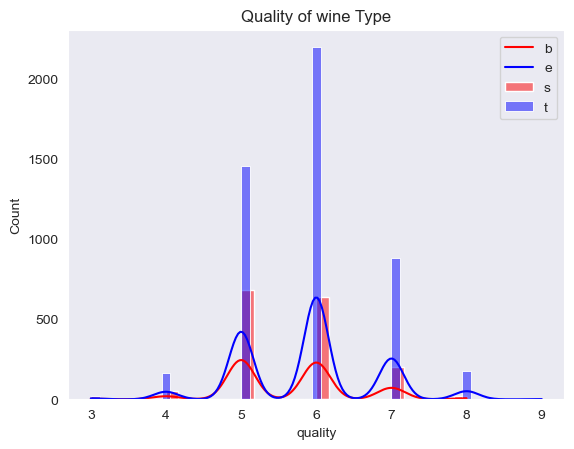

In [102]:
# distplot -> histplot
sns.histplot(data=red_wine_quality, kde=True, color="red", label='red_wine')
sns.histplot(data=white_wine_quality, kde=True, color="blue", label='white_wine')
plt.title('Quality of wine Type')
plt.legend('best')
plt.show()

# 부분 회귀 플롯으로 시각화하기
- 독립변수가 2개 이상인 경우 부분회귀플롯을 사용하여 하나의 독립변수가 종속변수에 미치는 여햑력을 시각화하여 분석할 수 있음.
- plot_partregress(endog, exog_i, exog_others, data=None, obs_labels=True, ret_coords=False)
    - endog : 종속변수 분자열
    - exog_i : 분석 대상이 되는 독립변수 문자열리스트
    - exog_others : 나머지 독립변수 문자열의 리스트
    - data : 모든 데이터가 있는 데이터프레임
    - obs_labels : 데이터 라벨링 여부
    - ret_coords: 잔차 데이터 반환여부

In [105]:
# 부분회귀계산을 위해 로드
import statsmodels.api as sm

In [125]:
# fixed_acidity가 종속변수 quality에 미치는 영향을 시각화하기
# 부분 회귀에 사용한 독립변수와 종속 변수를 제외한 나머지 변수 리스트를 others변수에 저장
others=list(set(wine.columns).difference(set(['quality', 'fixed_acidity'])))
print(others)

['free_sulfur_dioxide', 'density', 'chlorides', 'pH', 'citric_acid', 'volatile_acidity', 'alcohol', 'total_sulfur_dioxide', 'sulphates', 'residual_sugar']


eval_env: 1


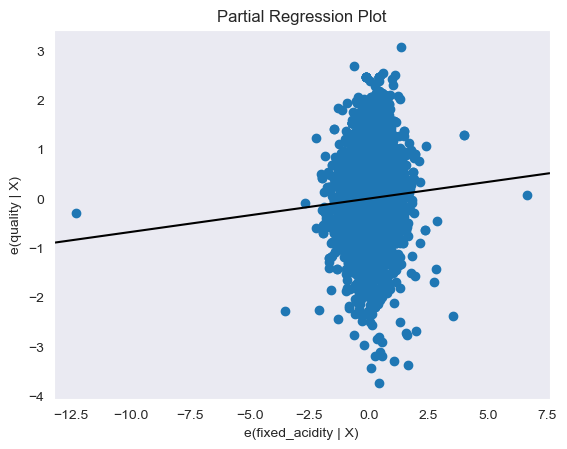

In [126]:
p, resids=sm.graphics.plot_partregress('quality','fixed_acidity', others, data=wine, ret_coords=True, obs_labels=False)

plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


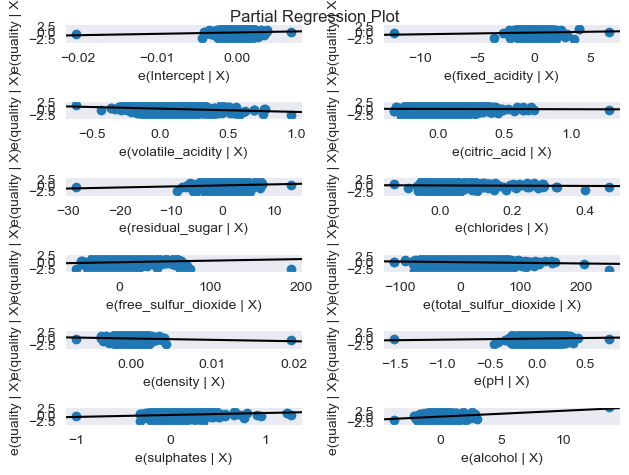

<Figure size 800x1300 with 0 Axes>

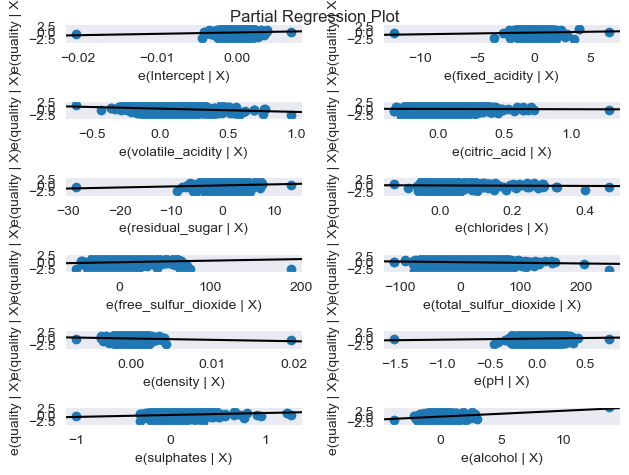

In [127]:
fig=plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result)